-------
## Objective

Malignant tumors that occur in the glandular epithelium of the breast are called breast cancers, which are cancers that develop from breast tissue. Breast cancer has now become a relatively common tumor that threatens women's physical and mental health.  
Although breast cancer is the most common gynecological cancer, most breast lumps are not cancer. In fact, more than 80 percent of breast lumps end up being benign. However, can we identify breast cancer from a breast lump?  
I developed an analysis and prediction algorithm to predict breast cancer using data obtained from: <https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29>  
Data can be viewed through Streamlit dashboard: <https://share.streamlit.io/liyiliang999/breast_cancer_prediction/main/app.py>  
I found out that some features can greatly help us distinguish mglignant tumors.

## Data Processing

In [51]:
#import packages
import warnings;
warnings.filterwarnings("ignore");

In [52]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from sklearn.linear_model import LogisticRegression;

In [2]:
#read data
data = pd.read_csv("data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


I printed out our data, there are 569 rows and 33 columns in the data. I found out that the last column is meaningless, I decided to remove the last column.

In [4]:
data = data.iloc[:,0:-1] #removing the last column

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Now the last column is gone.

**The first 5 rows of data**

In [6]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**The summary of data**

In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Based on the output above, we can easily see the mean value, standard deviation, minimum, maximum and quantiles of each numeric features.

**Data Info**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Based on the information above, we can see that there are currently still 32 columns in the data.

'id' is integer. 'diagnosis' is 'B' or 'M' which means the tumor is benign or malignant. 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst' are features. 


Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter) 
- texture (standard deviation of gray-scale values) 
- perimeter 
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0) 
- concavity (severity of concave portions of the contour) 
- concave points (number of concave portions of the contour) 
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image.

**Check Missing Values**

In [9]:
pd.isna(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
pd.isna(data).sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There are no missing values in this dataset.

## Data Exploration

In [11]:
data2 = data.iloc[:,1:] #data2 dropped id

Text(0.5, 1.0, 'Counts of Diagnosis')

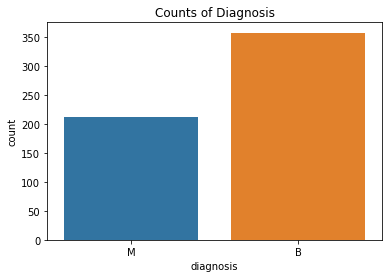

In [12]:
sns.countplot(x='diagnosis', data = data)
plt.title( 'Counts of Diagnosis' )

Class distribution: 357 benign, 212 malignant.  
There are 357 benign cases and 212 malignant cases in the dataset.

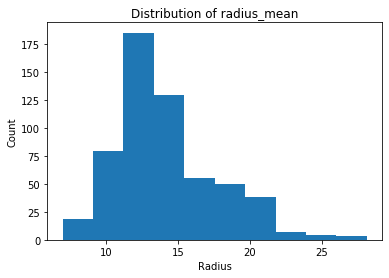

In [13]:
plt.hist( data['radius_mean'])
plt.xlabel('Radius')
plt.ylabel('Count')
plt.title( 'Distribution of radius_mean' )
plt.show()

radius_mean is mostly distributed between 10-15.

Text(0.5, 1.0, 'Boxplot of radius_mean')

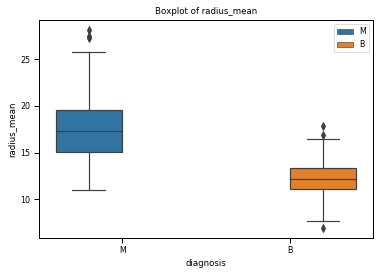

In [14]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='radius_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of radius_mean' )

From the boxplot above, we can easily tell that malignant tumors tend to have larger radius_mean.

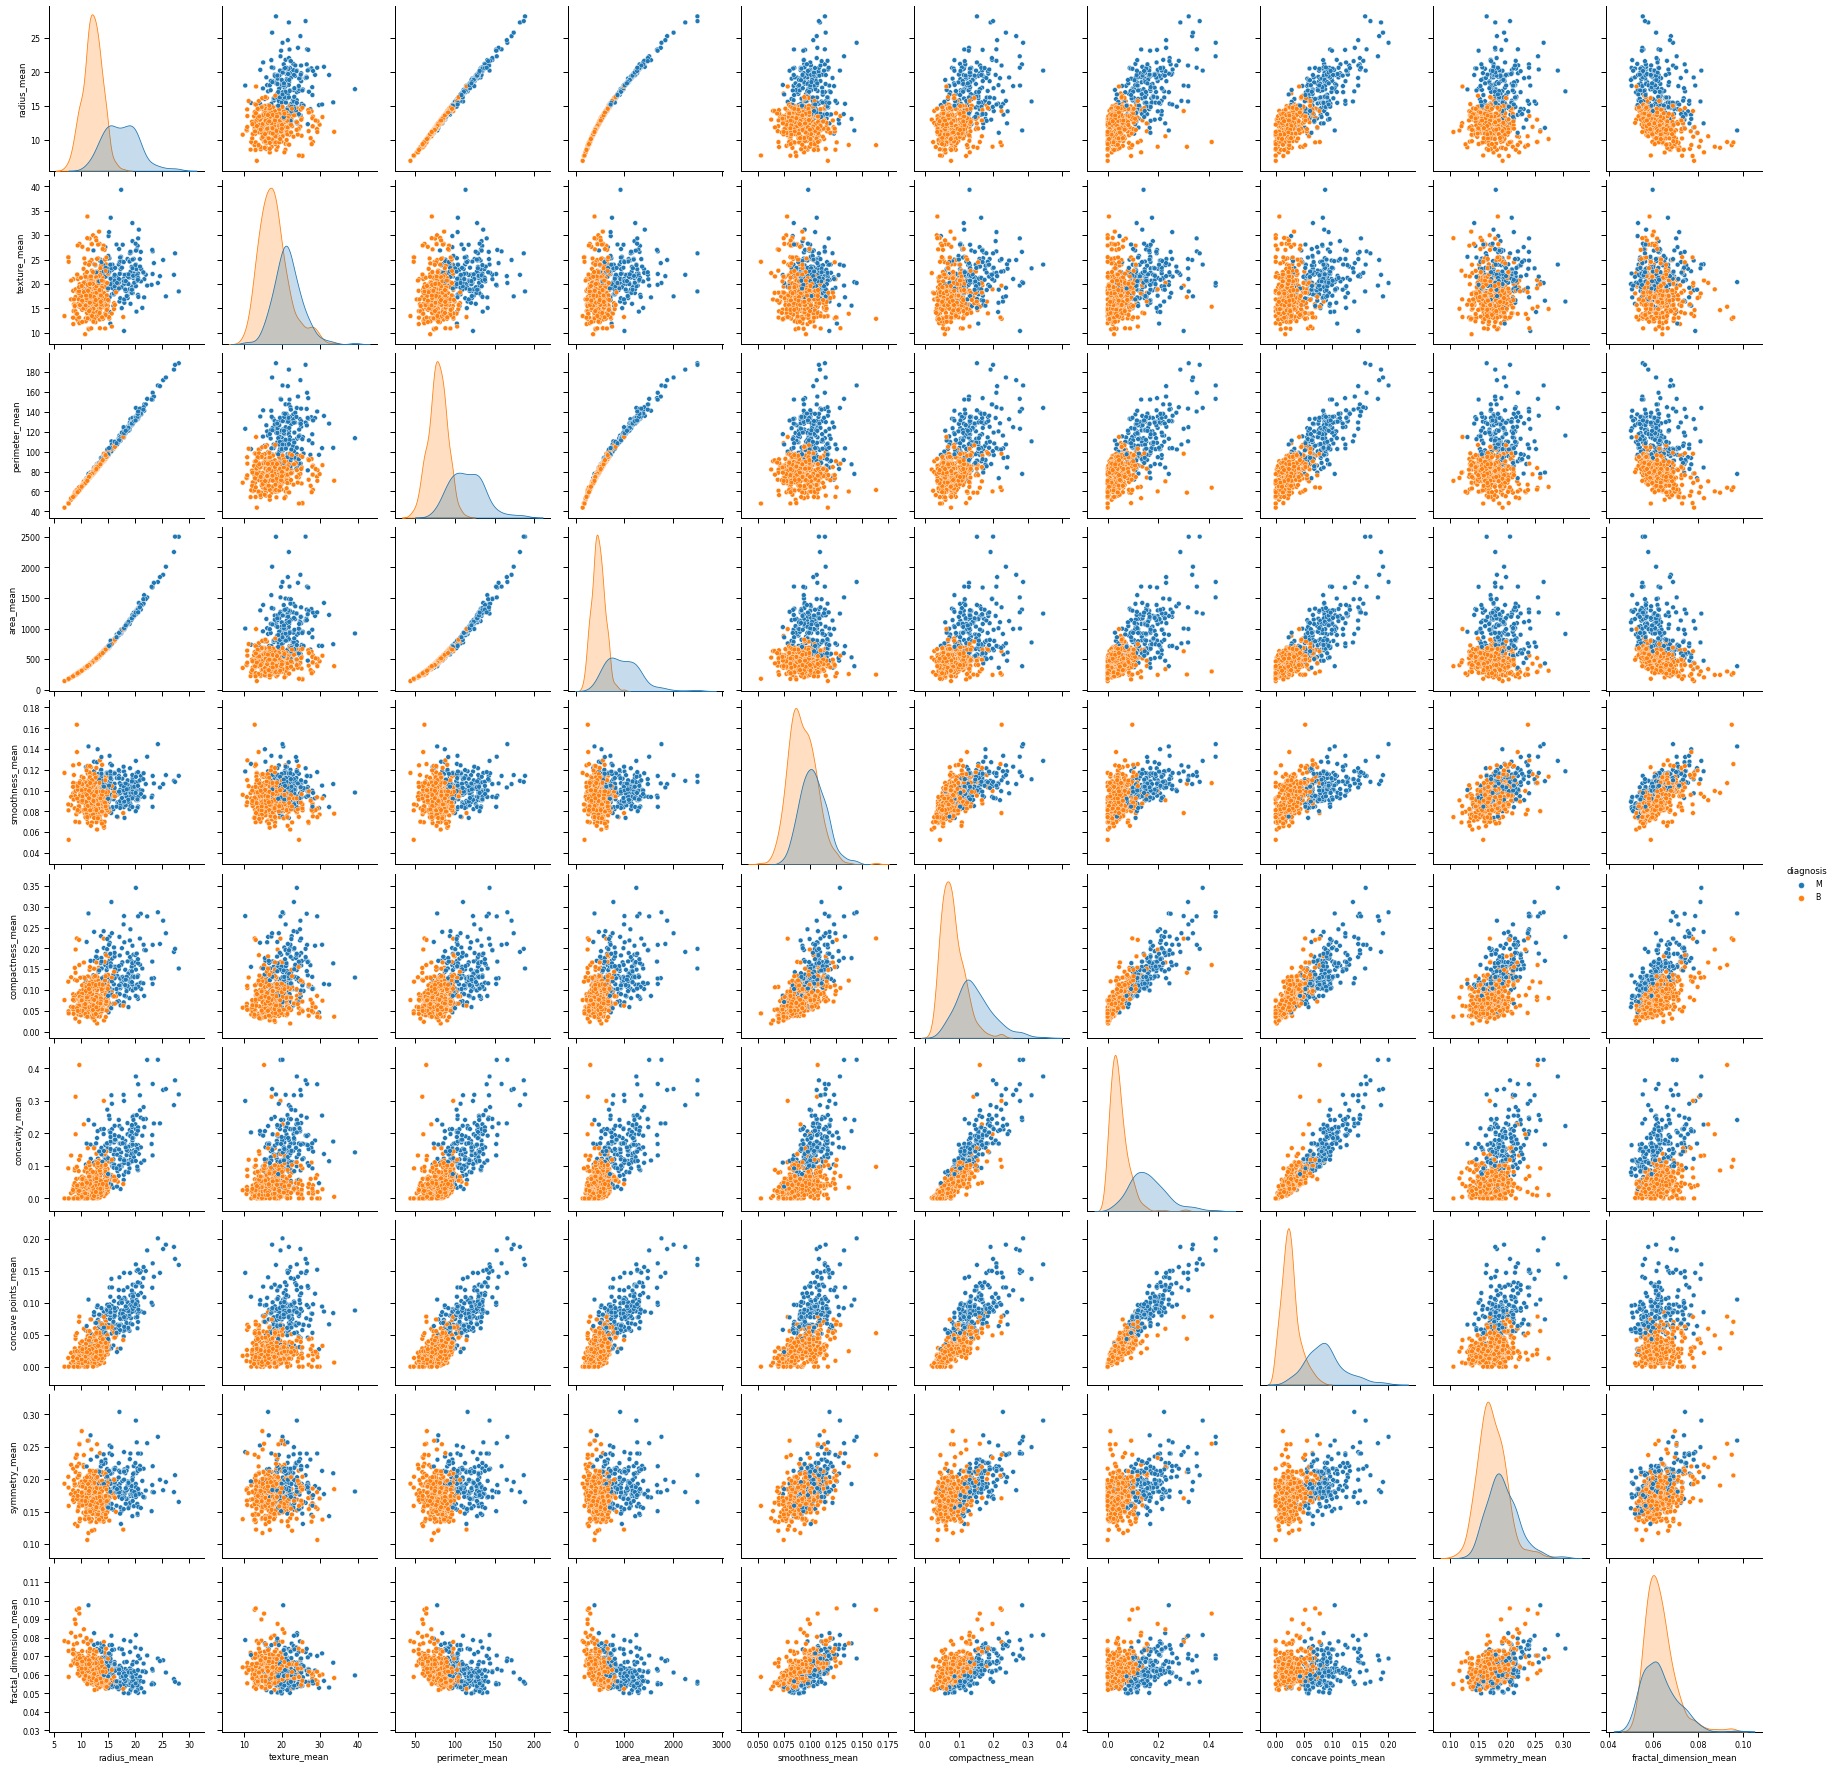

In [15]:
sns.pairplot(data2.iloc[:,0:11],hue='diagnosis')

*From this pairplot, we can easily identify some patterns from the data.*

perimeter_mean and radius_mean are highly correlated. There is a strong positive linear relationship between them.

perimeter_mean and area_mean, perimeter_mean and concavity_mean, concavity_mean and concave points_mean are highly correlated too.

There is a huge difference between between benign cases and malignant cases in radius_mean, perimeter_mean, area_mean, concavity_mean, concave points_mean. But not so much in fractal_dimension_mean. fractal_dimension_mean might be a bad indicator to distinguish benign cases and malignant cases.

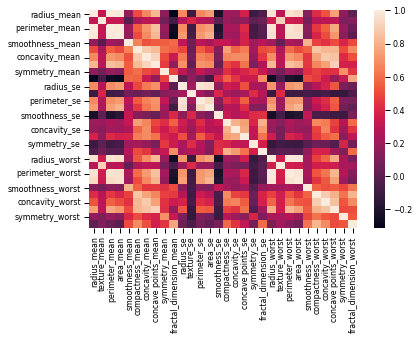

In [16]:
sns.heatmap(data2.corr())

The lighter the color means the more the two features are correlated.   

We can easily tell that features like perimeter_mean and radius_mean are highly correlated.

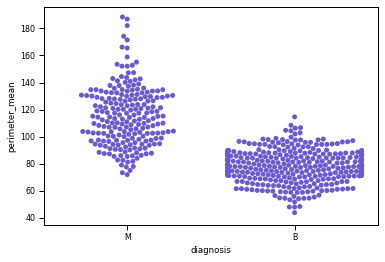

In [17]:
sns.swarmplot(x='diagnosis', y='perimeter_mean',data=data,color='slateblue')

perimeter_mean is higher in malignant tumors.

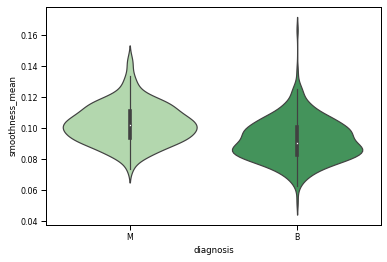

In [18]:
sns.violinplot(x='diagnosis', y='smoothness_mean',data=data,palette='Greens')

smoothness_mean is higher in malignant tumors, but not by a huge margin compared to other features.

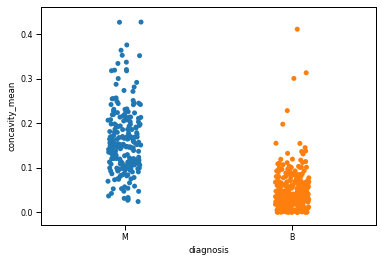

In [19]:
sns.stripplot(x='diagnosis', y='concavity_mean',data=data,jitter=True)

concavity_mean is higher in malignant tumors.

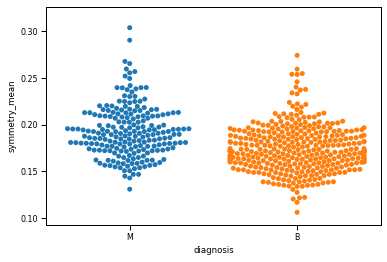

In [20]:
sns.swarmplot(y='symmetry_mean',data=data,x='diagnosis')

There is not a big difference in symmetry_mean between benign and malignant tumors.

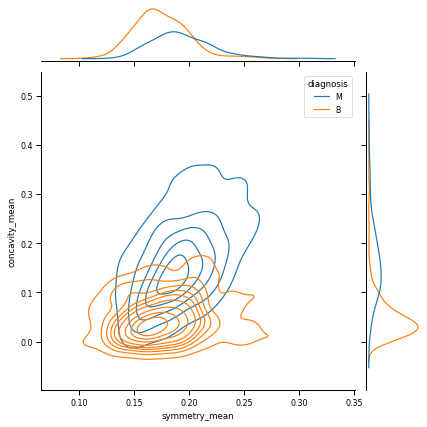

In [21]:
sns.jointplot(x='symmetry_mean',y='concavity_mean', data=data, kind='kde',hue='diagnosis')

Malignant tumors seem to have higher symmetry_mean and lower concavity_mean.

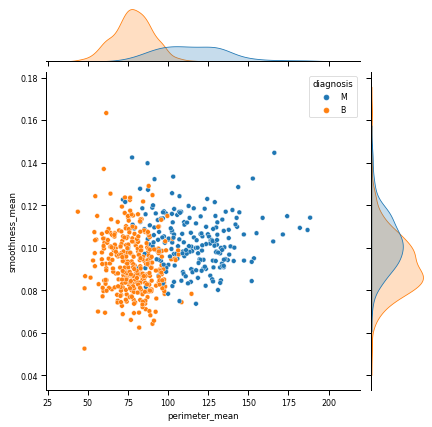

In [22]:
sns.jointplot(x='perimeter_mean',y='smoothness_mean', data=data,hue='diagnosis')

Malignant tumors seem to have higher perimeter_mean and smoothness_mean. And they don't seem to be correlated.

Text(0.5, 1.0, 'Boxplot of texture_mean')

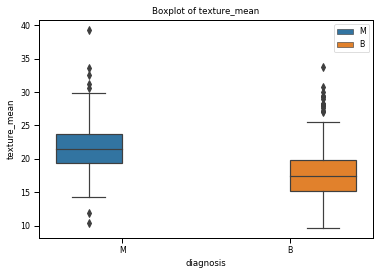

In [23]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='texture_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of texture_mean' )

Malignant tumors have higher texture_mean.

Text(0.5, 1.0, 'Boxplot of area_mean')

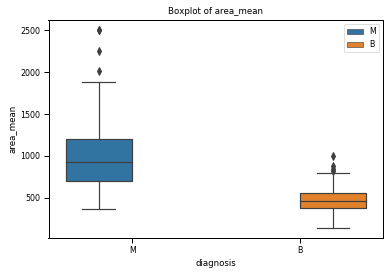

In [24]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='area_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of area_mean' )

Malignant tumors have higher area_mean.

Text(0.5, 1.0, 'Boxplot of compactness_mean')

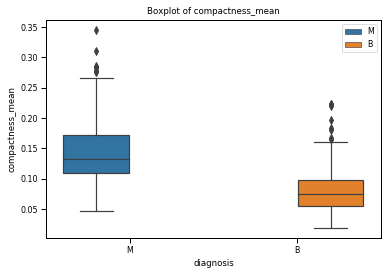

In [25]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='compactness_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of compactness_mean' )

Malignant tumors have higher compactness_mean.

Text(0.5, 1.0, 'Boxplot of concave points_mean')

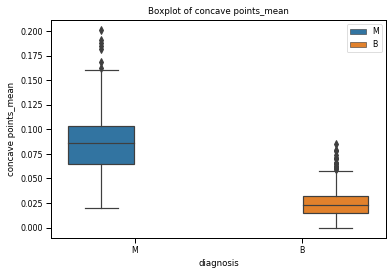

In [26]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='concave points_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of concave points_mean' )

Malignant tumors have higher concave points_mean.

Text(0.5, 1.0, 'Boxplot of fractal_dimension_mean')

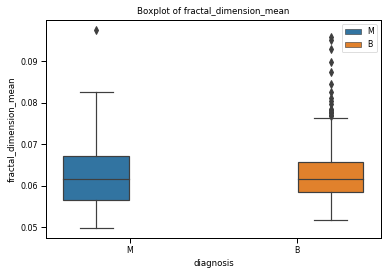

In [27]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='fractal_dimension_mean', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of fractal_dimension_mean' )

There is no noticeable difference in fractal_dimension_mean between benign and malignant tumors.

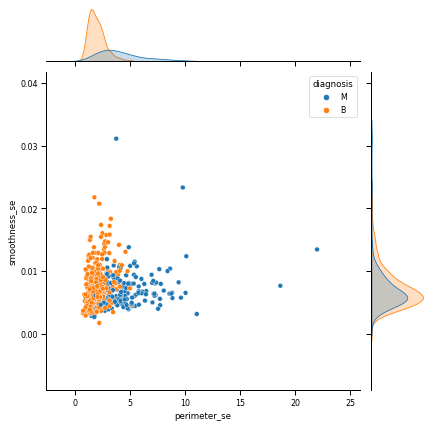

In [28]:
sns.jointplot(x='perimeter_se',y='smoothness_se', data=data,hue='diagnosis')

Malignant tumors tend to have higher smoothness_se, but no noticeable difference in smoothness_se.

Text(0.5, 1.0, 'Boxplot of radius_se')

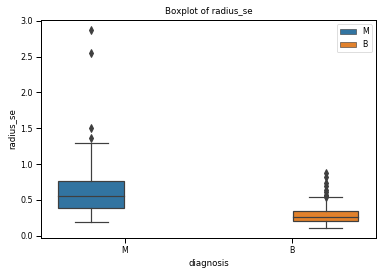

In [29]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis',y='radius_se', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of radius_se' )

Malignant tumors have higher radius_se.

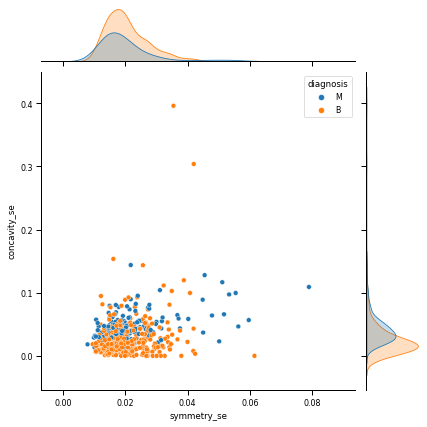

In [30]:
sns.jointplot(x='symmetry_se',y='concavity_se', data=data,hue='diagnosis')

There is no big difference between benigh and malignant tumors in symmetry_se. Malignant tumors may have higher concavity_se.

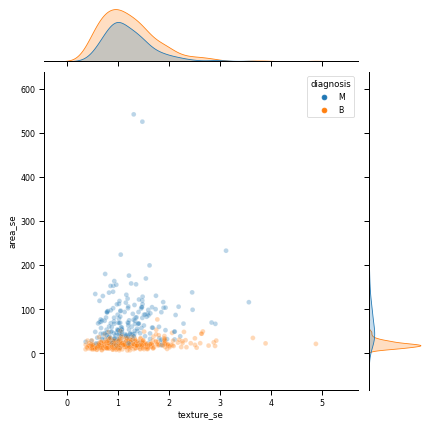

In [31]:
sns.jointplot(x='texture_se',y='area_se', data=data, alpha=0.3,hue='diagnosis')

Maglinant tumors have higher area_se, but no noticeable texture_se difference.

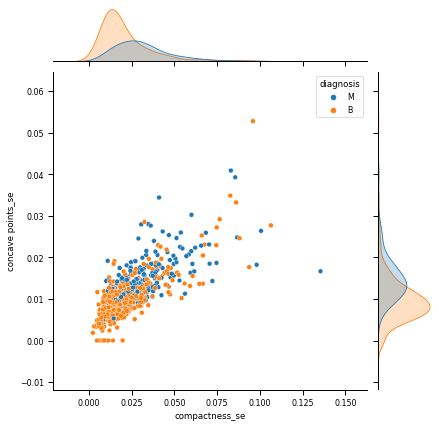

In [32]:
sns.jointplot(data=data, x="compactness_se", y="concave points_se", hue='diagnosis')

Maglinant tumors have higher compactness_se and concave points_se. And these two features are highly correlated.

Text(0.5, 1.0, 'Scatter Plot of fractal_dimension_mean and fractal_dimension_se')

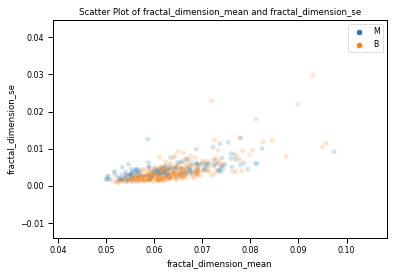

In [33]:
sns.set_context('paper', font_scale=0.9)
sns.scatterplot( x='fractal_dimension_mean',y='fractal_dimension_se', data=data, hue='diagnosis', alpha=0.2)
plt.legend(loc=0)
plt.title( 'Scatter Plot of fractal_dimension_mean and fractal_dimension_se' )

fractal_dimension_mean and fractal_dimension_se are highly correlated. But there is no big fractal_dimension_mean or fractal_dimension_se difference between benigh and malignant tumors.

Text(0.5, 1.0, 'Boxplot of fractal_dimension_se')

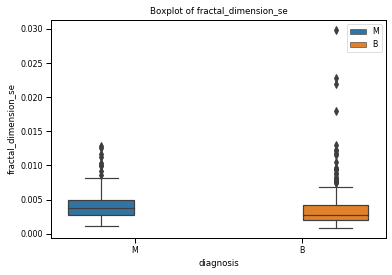

In [34]:
sns.set_context('paper', font_scale=0.9)
sns.boxplot(x='diagnosis', y='fractal_dimension_se', data=data, hue='diagnosis')
plt.legend(loc=0)
plt.title( 'Boxplot of fractal_dimension_se' )

fractal_dimension_se doesn't vary much between benigh tumors and malignant tumors.

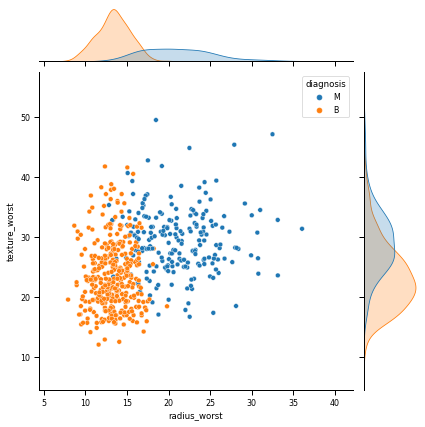

In [35]:
sns.jointplot(x='radius_worst',y='texture_worst', data=data,hue='diagnosis')

Maglinant tumors have higher radius_worst and texture_worst.

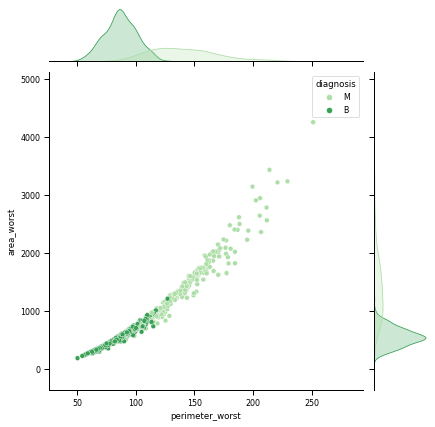

In [36]:
sns.jointplot(x='perimeter_worst',y='area_worst', data=data,hue='diagnosis',palette='Greens')

Malignant tumors have higher perimeter_worst and area_worst. These two features are highly correlated.

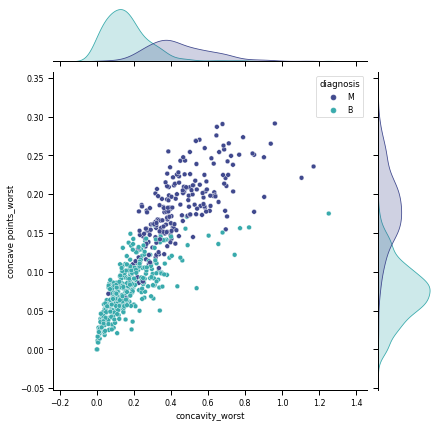

In [37]:
sns.jointplot(x='concavity_worst',y='concave points_worst', data=data,hue='diagnosis',palette='mako')

Malignant tumors have higher concavity_worst and concave points_worst. These two features are highly correlated.

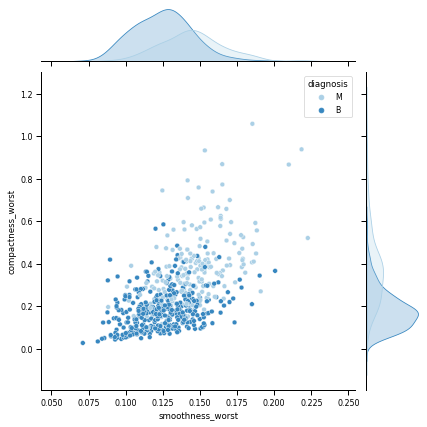

In [38]:
sns.jointplot(x='smoothness_worst',y='compactness_worst', data=data,hue='diagnosis',palette='Blues')

Malignant tumors have higher smoothness_worst and compactness_worst. These two features are somewhat correlated.

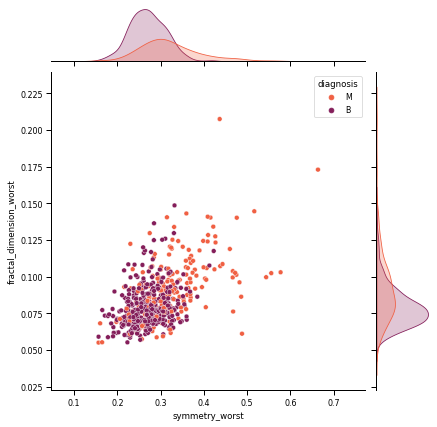

In [39]:
sns.jointplot(x='symmetry_worst',y='fractal_dimension_worst', data=data,hue='diagnosis',palette='rocket_r')

Malignant tumors have higher symmetry_worst. Not much difference on fractal_dimension_worst.

## Data Modelling

In [40]:
data.replace('M',1,inplace=True)

In [41]:
data.replace('B',0,inplace=True)

### Training set and test set split

In [42]:
seed     = 0                                          # pick a seed to keep it consistent
df_train = data.sample( frac=0.7, random_state=seed )   # 0.7 means we used 70% as the training set
df_test  = data.drop( df_train.index )                  # "all the rows not in df_train"

### Linear Regression

In [43]:
predictors = df_train.iloc[:,1:]
response   = df_train['diagnosis']

In [44]:
# Import the module
from sklearn.linear_model import LogisticRegression

# Create a model and fit it to the data
model = LogisticRegression()
model.fit( predictors, response )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### Test the model

In [45]:
predictors_test = df_test.iloc[:,1:]
response_test   = df_test['diagnosis']

In [46]:
# Use the model to predict the output variable based on the input variables:
df_test['Prediction'] = model.predict( predictors_test )
# Check whether each prediction was correct or not, and show the results:
df_test['Correct'] = df_test['Prediction'] == response_test
df_test

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Prediction,Correct
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.14710,...,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1,True
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.10520,...,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1,True
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.08543,...,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1,True
11,84610002,1,15.78,17.89,103.60,781.0,0.09710,0.12920,0.099540,0.06606,...,136.50,1299.0,0.13960,0.56090,0.39650,0.18100,0.3792,0.10480,1,True
16,848406,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.05259,...,123.40,1138.0,0.14640,0.18710,0.29140,0.16090,0.3029,0.08216,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,923780,0,11.13,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,...,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,0,True
556,924964,0,10.16,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,0,True
558,925277,0,14.59,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,0,True
559,925291,0,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,0,True


In [47]:
df_test['Correct'].sum() / len(df_test)

1.0

The model reached 100% accuracy. 

In [48]:
# True positive means the answer and the prediction were positive.
TP = ( df_test['diagnosis'] & df_test['Prediction'] ).sum()
# Similarly for the other three.
TN = ( ~df_test['diagnosis'] & ~df_test['Prediction'] ).sum()
FP = ( ~df_test['diagnosis'] & df_test['Prediction'] ).sum()
FN = ( df_test['diagnosis'] & ~df_test['Prediction'] ).sum()

# Precision and recall are defined using the formulas above.
precision = TP / ( TP + FP )
recall = TP / ( TP + FN )

precision, recall

(1.0, 1.0)

The model has perfect precision and recall.

## Summary

In this report, I explored a breast cancer dataset with 30 features including 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'. 


They are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter) 
- texture (standard deviation of gray-scale values) 
- perimeter 
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0) 
- concavity (severity of concave portions of the contour) 
- concave points (number of concave portions of the contour) 
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image.

Malignant tumors tend to have higher 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'. But malignant tumors and benigh tumors tend to have similar 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst'.

In the last part, I developed a logistic regression model that reached perfect prediction accuracy.